In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(256, 256)


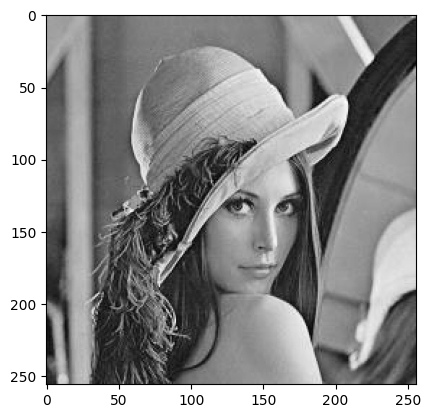

In [3]:
img1 = cv2.imread('../images/lena256.jpg')
RGB_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

gImg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg.shape)
plt.imshow(gImg, cmap='gray')

소벨 마스크

In [17]:
gx = np.array([[-1, -2, -1], [0,0,0], [1, 2, 1]], dtype = int)
gy = np.array([[1, 0, -1],[2,0,-2],[1, 0, -1]], dtype = int)

In [18]:
x = cv2.filter2D(gImg, -1, gx)
y = cv2.filter2D(gImg, -1, gy)

In [19]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
outimg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

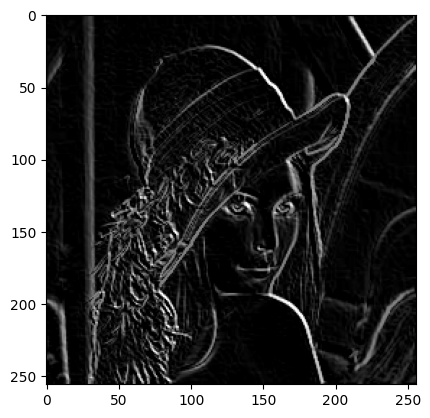

In [20]:
#outimg = outimg * 5
plt.imshow(outimg, cmap='gray')

In [8]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]), dtype = np.ubyte)

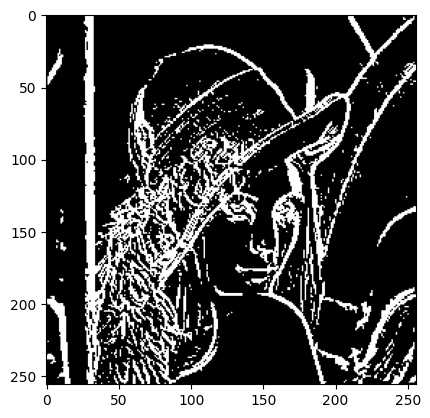

In [9]:
threshold = 30

for h in range(gImg.shape[0]):
  for w in range(gImg.shape[1]):
    if(outimg[h,w] > threshold):
      gBin[h,w] = 255

plt.imshow(gBin, cmap='gray')

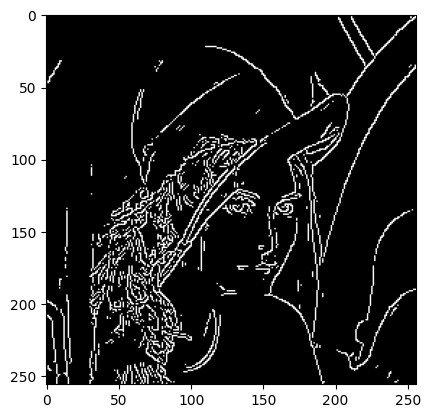

In [23]:
cannyImg = cv2.Canny(gImg, 200, 200)
plt.imshow(cannyImg, cmap='gray')

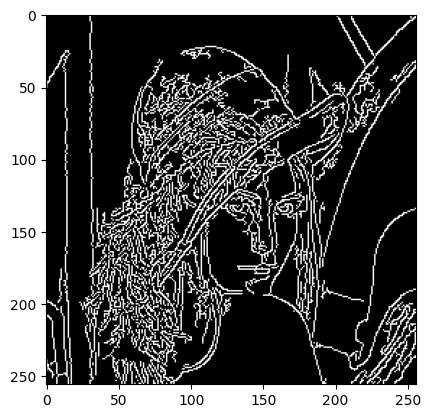

In [11]:
cannyImg = cv2.Canny(gImg, 20, 200)
plt.imshow(cannyImg, cmap='gray')

In [12]:
blurImg = cv2.GaussianBlur(gImg, (5,5), 1.4)

In [13]:
x = cv2.filter2D(blurImg, -1, gx)
y = cv2.filter2D(blurImg, -1, gy)

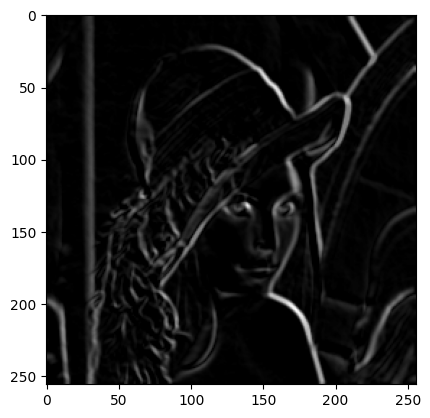

In [14]:
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
cannyOutImg = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)
plt.imshow(cannyOutImg, cmap='gray')

### 왜 캐니 알고리즘을 사용하지 않았는가 ? - 그만큼 많이 사용

In [15]:
blurImg = cv2.GaussianBlur(gImg, (5,5), 1.4)

In [16]:
x = cv2.filter2D(blurImg, -1, gx)
y = cv2.filter2D(blurImg, -1, gy)